In [15]:
import pandas as pd
import numpy as np

from keras.models import Model, Sequential
from keras.layers import Input, Flatten,Embedding, TimeDistributed, Dense, GRU, Conv1D, Dropout
from keras.utils import to_categorical
from keras.regularizers import l2

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, roc_auc_score, classification_report

Specifying input_shape

input_shape, a tuple, always works

Some 2D layers, such as dense, support input_dim and some 3D temporal layers support input_dim along with input_length.

BUT input_shape always works

### Input shapes by type

**Dense:** input_shape=(number_of_features,)

**Conv2D:** input_shape=(height,width,num_channels)

**Embedding:** Embedding(vocab_size, output_dim=embed_size, input_length=max_seq_len)

Time: 
- **RNN:** input_shape=(timesteps, number_of_features)
- **Conv1D:** input_shape=(timesteps, number_of_features)
- **timeDistributedDense**model.add(TimeDistributed(Dense(3),input_shape=(timesteps,features)))

#### Uses
* Embedding is generally the right input for dense-categorical input features (split them from the real numbers and concat later). It is also usually the right approach for 1D series of words (sequence classification or language models), though RNN and Conv1D can also be tried.
* RNN, Conv1D, and TDD can all also be used for multivariable timeseries/longitudinal data. RNN and Conv1D run time-wise along each feature and concate the outputs of all. TDD acts as a timepoint embedding (applies the same dense transformation along the features at each timepoint). 
* Conv2D: images
* Dense: real numbers

### Final layer and compile

#### Binary classification
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=...)
    On New data:
    predicted = model.predict(X_test)

#### categorical classification
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=...)
    On New data:
    predicted = model.predict(X_test)
    predicted = np.argmax(predicted, axis=1)

#### Regression
    model.add(Dense(1))
    model.compile(loss='mse',...)

### Generate dummy data

In [8]:
# BINARY classification
# 1000 examples, each w/100 features
x_train = np.random.random((1000, 100))
# either 0 or 1. 1k examples. shape is (1k,1), not (1k,)
y_train = np.random.randint(2, size=(1000,1))

In [9]:
# CATEGORICAL
# Convert labels to categorical one-hot encoding
y_train = np.random.randint(10, size=(1000,1))
one_hot_labels = keras.utils.to_categorical(y_train, num_classes=10)
#
x_test = np.random.random((100, 100))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)

In [10]:
# Sequnces
# NOTE, for sequence classification, you want the categorical example above
# this produces an array of len(num_classes) for the labels
number_of_features = 16
timesteps = 8
num_classes = 10
# Generate dummy training data
x_train = np.random.random((1000, timesteps, number_of_features))
y_train = np.random.random((1000, num_classes))

In [11]:
# IMAGES
# Generate dummy data
x_train = np.random.random((100, 100, 100, 3))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
x_test = np.random.random((20, 100, 100, 3))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)

### RNN behavior

n_units for an RNN is the 1D vector size you would like to use to represent each timestep the sequence that you are modeling.

The representation for each timestep is determined by 'looking at' the current step and considering the previous steps. So, the representation of the final step can be thought of as the representation of the entire sequence.

If you're going to pass the output to another recurrent layer, you want to return the representation of each timestep. If you're going to pass the output to a Dense layer (for classification etc) then you only want to return the final representation.

**Exception**:If you wanted to classify EACH timestep in a sequence, instead of labeling the whole sequence you'd want to return all of the representations:
    
    model.add(LSTM(32, return_sequences=True))
    model.add(Dense(3, activation='softmax'))
    Will assign 1 of 3 labels to each timestep in you sequence

use return_sequences=T for every layer EXCEPT the last
this is the representation of each timestep in the sequence
    
    model.add(LSTM(32, return_sequences=True))#returns a sequence of vectors of dimension 32

use return_sequence=F to get only the output of the last timestept
this is the representation of the entire sequence
    
    model.add(LSTM(32))  # return a single vector of dimension 32

# Model play space

In [62]:
# data
# BINARY classification
# 1000 examples, each w/5 features
x_train = np.random.random((1000, 5))
# either 0 or 1. 1k examples. shape is (1k,1), not (1k,)
y_train = np.random.randint(2, size=(1000,1))

x_test = np.random.random((1000, 5))
# either 0 or 1. 1k examples. shape is (1k,1), not (1k,)
y_test = np.random.randint(2, size=(1000,1))


# binary
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(5,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])



#multi-class
# history = model.fit(x_train, y=keras.utils.to_categorical(y_train), epochs=10, batch_size=32,
#                    validation_split = 0.2)
#binary
history = model.fit(x_train, y=y_train, epochs=10,
                   validation_split = 0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 0s 591us/step - loss: 0.6991 - acc: 0.4975 - val_loss: 0.6998 - val_acc: 0.4650
Epoch 2/10
800/800 [==============================] - 0s 90us/step - loss: 0.6941 - acc: 0.5062 - val_loss: 0.6994 - val_acc: 0.4550
Epoch 3/10
800/800 [==============================] - 0s 96us/step - loss: 0.6934 - acc: 0.5087 - val_loss: 0.6995 - val_acc: 0.4550
Epoch 4/10
800/800 [==============================] - 0s 94us/step - loss: 0.6925 - acc: 0.5125 - val_loss: 0.6997 - val_acc: 0.4550
Epoch 5/10
800/800 [==============================] - 0s 91us/step - loss: 0.6923 - acc: 0.5225 - val_loss: 0.6998 - val_acc: 0.4450
Epoch 6/10
800/800 [==============================] - 0s 91us/step - loss: 0.6921 - acc: 0.5212 - val_loss: 0.6998 - val_acc: 0.4550
Epoch 7/10
800/800 [==============================] - 0s 91us/step - loss: 0.6918 - acc: 0.5262 - val_loss: 0.6997 - val_acc: 0.4600
Epoch 8/10
800/800 [==

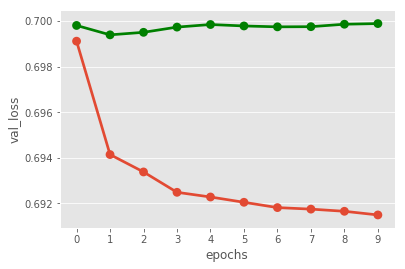

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
%matplotlib inline

df = pd.DataFrame({'epochs':history.epoch, 'train_loss': history.history['loss'], 'val_loss': history.history['val_loss']})
g = sns.pointplot(x="epochs", y="train_loss", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="val_loss", data=df, fit_reg=False, color='green')

## Examine Predictions vs Groundtruth

In [64]:
predictions_outcomes = pd.DataFrame({'class_prediction':model.predict_classes(x_test).flatten(),'class_probability': model.predict(x_test).flatten(),'true_outcome':y_test.flatten()})

In [65]:
data_po = pd.concat([pd.DataFrame(x_test),predictions_outcomes],axis=1)

In [66]:
data_po.head()

,0,1,2,3,4,class_prediction,class_probability,true_outcome
0,0.139846,0.685071,0.781852,0.972474,0.217400,0,0.462348,1
1,0.422222,0.288612,0.190180,0.124092,0.376085,0,0.489735,0
2,0.573151,0.615904,0.506474,0.114305,0.245147,0,0.468573,0
3,0.531386,0.881341,0.438206,0.166081,0.729551,0,0.467051,0
4,0.306965,0.962802,0.201672,0.311183,0.239848,0,0.457483,1


# Quick and Dirty Architectures

## Sequence Classification

### Preprocessing

Assuming that you have a dataframe as input with 2 columns: 
- Text: the words in the sequence
- Label: the classification for the sequence

Steps:
- Instantiate Tokenizer
- fit_on_texts
- texts_to_sequences
- pad_sequences

In [3]:
#https://shrikar.com/deep-learning-with-keras-and-python-for-multiclass-classification/
import pandas as pd
data = pd.read_csv('stackoverflow/stackoverflow.csv')
data.rename(columns={'post':'Text','tags':'Label'},inplace=True)

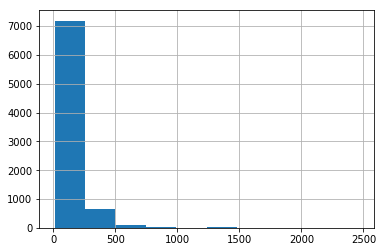

In [5]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Get a distribution of the number of words in each text
data['num_words'] = data.Text.apply(lambda x : len(x.split()))
data.num_words.hist()

# assign bins
data['bins'] = pd.cut(data.num_words, bins=[0,300,600,np.inf],labels=['0-300','300-600','600-inf'])
# word_distribution = data.groupby('bins').size().reset_index().rename(columns={0:'counts'})
# word_distribution.head()
data.bins.value_counts()

MAXLEN = 600
# convert tags to labels
num_class = data.tags.nunique()
data['targets'] = data.tags.astype('category').cat.codes
labels_OH = to_categorical(data.targets,num_classes=num_class)

# tokenizer object
tokenizer = Tokenizer()

# fit tokenizer to text to create a dict
tokenizer.fit_on_texts(data.post.values)
vocab_size = len(tokenizer.word_index) + 1
# assign new object using texts_to_sequences
seqs = tokenizer.texts_to_sequences(data.post.values)
# pad sequences
padded_seqs = pad_sequences(seqs, maxlen=MAXLEN)

x_train,x_test,y_train,y_test = train_test_split(padded_seqs,data.targets,stratify=data.targets,random_state=42,test_size=0.2)


### Model

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Conv1D, MaxPooling1D,Dropout
from keras.layers.embeddings import Embedding

embedding_vecor_length= 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_vecor_length, input_length=MAX_LENGTH))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Dense(num_class, activation='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',
             metrics=['acc'])

In [9]:
history = model.fit(x_train,to_categorical(y_train,num_classes=num_class),validation_split=0.2,epochs=5)

Train on 5120 samples, validate on 1280 samples
Epoch 1/5
5120/5120 [==============================] - 70s 14ms/step - loss: 1.0085 - acc: 0.5145 - val_loss: 0.5921 - val_acc: 0.7016
Epoch 2/5
5120/5120 [==============================] - 68s 13ms/step - loss: 0.3547 - acc: 0.8641 - val_loss: 0.3183 - val_acc: 0.9008
Epoch 3/5
5120/5120 [==============================] - 68s 13ms/step - loss: 0.1414 - acc: 0.9615 - val_loss: 0.2324 - val_acc: 0.9273
Epoch 4/5
5120/5120 [==============================] - 68s 13ms/step - loss: 0.0759 - acc: 0.9803 - val_loss: 0.2670 - val_acc: 0.9352
Epoch 5/5
5120/5120 [==============================] - 68s 13ms/step - loss: 0.0545 - acc: 0.9865 - val_loss: 0.3146 - val_acc: 0.9313


In [ ]:
probs = model.predict(x_test)
probs = [i[np.argmax(i)] for i in probs]
classes = model.predict_classes(x_test)
c = data.Text.astype('category')
d = dict(enumerate(c.cat.categories))
d
ff['category'] = ff['truth'].apply(lambda x: d[x])

# Pre-trained Image Models

This is fairly straight-forward, but code intensive. Checkout the following:

- https://keras.io/applications/ : clear examples of transfer learning and fine-tuning
- https://medium.com/@14prakash/transfer-learning-using-keras-d804b2e04ef8 : More detailed examples including loading new data and image augmentation, etc. Also contains suggestions for each of the 4 primary scenarios when considering how new data relates to the pre-trained model
- See HERE fastai notebooks for some nice image scrapping examples. 

In general, I greatly prefer the fastai framework for building/training image models, since these are typically clearly defined problems.

# rec sys

See notebook: rec_sys.ipynb for complete examples including visualizing the learned embedding space.

For simple collaborative filtering, expect a dataframe w/3 columns: user_id, prod_id, rating where all are integers. 

1. Get num_users and num_products
2. train,test split. Stratification doesn't make sense here so we skip it
3. Input, Embed, Flatten for both legs: users,products
4. prod = Dot(Axis=1, normalize=False) (or concate alternatively). Then add some dropout and dense layers following
5. model = Model([productInput,userInput],prod)
6. Compile/train
7. Get predictions and maybe calc r2 in addition to mse
8. Make recommendations: Feed in 1 user and ALL books: Then select the books that have the highest predicted rating for that specific user.

Make recommendations

    user_id = 1
    user = np.array([user_id for i in range(len(book_list))])
    predicted_ratings = model.predict([user,book_list]) 
    predicted_ratings = np.array([i[0] for i in predicted_ratings])
    recommended_book_ids = (-predicted_ratings).argsort()
    top_5 = recommended_book_ids[:5]
    print(list(zip(top_5,predicted_ratings[top_5]))) # get the predicted rating for each rec

# Longitudinal Modeling

In [3]:
data = pd.read_csv("all_data_dense.csv")

In [4]:
data.head()

,case,timepoint,CDAI,CRP,ESR,dmard,steroid
0,0,0,0.00,0.0,0.000000,noDMARD,noSteroid
1,0,1,0.00,0.0,0.000000,noDMARD,noSteroid
2,0,2,0.00,0.0,0.000000,noDMARD,noSteroid
3,0,3,0.08,0.0,0.100775,noDMARD,noSteroid
4,1,0,0.00,0.0,0.000000,noDMARD,noSteroid


In [5]:
data.dmard.nunique(), data.steroid.nunique()

(15, 8)

In [6]:
15+8+3

26

In [7]:
data.set_index('case',inplace=True)
# assumes data is already sorted by case and timepoint
del data['timepoint']

In [8]:
data = pd.get_dummies(data, columns=['dmard','steroid'])
data.shape

(2312, 26)

In [9]:
# convert to timeseries format for modeling

# assumes data is already sorted by case and timepoint
# groupby creates a dictionary
# here we use the case/person/stock_ticker etc as the key, which we will then ignore
# we convert the value for each person into a list [person[time1_var1, time1_var2, time1_varN],[time2_var1,... ,time2_varN]]
# and finally stack all patients into an array
ts = np.stack([vv for kk,vv in data.groupby('case')])
ts.shape

# to see the above easily, just run this pipeline w/o the get_dummies cell above and compare
# data.head() to ts[0]

(578, 4, 26)

In [57]:
# ts[0]

array([[0.0, 0.0, 0.0, 'noDMARD', 'noSteroid'],
       [0.0, 0.0, 0.0, 'noDMARD', 'noSteroid'],
       [0.0, 0.0, 0.0, 'noDMARD', 'noSteroid'],
       [0.08, 0.0, 0.100775193798, 'noDMARD', 'noSteroid']], dtype=object)

In [10]:
labels = pd.read_csv('all_set_label.csv')
del labels['Unnamed: 0']
# ingoring the group for now
del labels['set']
labels.head()

,label
0,0
1,0
2,0
3,0
4,1


In [18]:
timesteps,features = ts.shape[1],ts.shape[2]
model = Sequential()
model.add(TimeDistributed(Dense(4,activation='relu'),input_shape=(timesteps,features)))
model.add(Dropout(0.2))
model.add(GRU(32,recurrent_dropout = 0.3,activation='relu',
              kernel_regularizer=l2(0.00674),
              recurrent_regularizer=l2(0.00544)))

model.add(Dropout(0.5))
model.add(Dense(32,activation='relu',kernel_regularizer=l2(0.0005)))

model.add(Dense(1, activation='sigmoid'))

In [21]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(ts, labels,validation_split=0.2,epochs=50)

Train on 462 samples, validate on 116 samples
Epoch 1/50
462/462 [==============================] - 4s 9ms/step - loss: 0.9244 - acc: 0.4286 - val_loss: 0.8918 - val_acc: 0.6207
Epoch 2/50
462/462 [==============================] - 0s 377us/step - loss: 0.8725 - acc: 0.5693 - val_loss: 0.8481 - val_acc: 0.6034
Epoch 3/50
462/462 [==============================] - 0s 379us/step - loss: 0.8323 - acc: 0.6039 - val_loss: 0.8131 - val_acc: 0.6034
Epoch 4/50
462/462 [==============================] - 0s 375us/step - loss: 0.7999 - acc: 0.6017 - val_loss: 0.7852 - val_acc: 0.6034
Epoch 5/50
462/462 [==============================] - 0s 376us/step - loss: 0.7749 - acc: 0.6017 - val_loss: 0.7618 - val_acc: 0.6034
Epoch 6/50
462/462 [==============================] - 0s 376us/step - loss: 0.7543 - acc: 0.6017 - val_loss: 0.7439 - val_acc: 0.6034
Epoch 7/50
462/462 [==============================] - 0s 381us/step - loss: 0.7375 - acc: 0.6017 - val_loss: 0.7290 - val_acc: 0.6034
Epoch 8/50
462/462